In [1]:
import numpy as np

In [17]:
a = np.zeros((2, 3, 4))

In [18]:
print(a)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [19]:
import random

In [20]:
for i in range(0,2):
    for j in range(0,3):
        for k in range(0,4):
            a[i][j][k]=random.randint(0,255)

[[[ 78.  41. 230. 226.]
  [151.  10. 252. 169.]
  [208. 190.   5. 207.]]

 [[ 37. 254.  94.  64.]
  [156. 131. 185.  47.]
  [ 41. 248. 241. 185.]]]


In [22]:
import cv2

In [23]:
a=np.pad(a, 1, mode='constant')

In [24]:
a

array([[[  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  78.,  41., 230., 226.,   0.],
        [  0., 151.,  10., 252., 169.,   0.],
        [  0., 208., 190.,   5., 207.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  37., 254.,  94.,  64.,   0.],
        [  0., 156., 131., 185.,  47.,   0.],
        [  0.,  41., 248., 241., 185.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.]]])

In [26]:
lbp=np.zeros((4,4))

In [27]:
print(lbp)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [28]:
for i in range(0,4):
    for j in range(0,4):
        lbp[i][j]=random.randint(0,255)

In [29]:
print(lbp)

[[201. 127. 149. 248.]
 [119. 231. 223. 116.]
 [187.  64. 197.   9.]
 [  6.  25.  96.  70.]]


In [30]:
lbp=np.pad(lbp, 1, mode='constant')

In [31]:
print(lbp)

[[  0.   0.   0.   0.   0.   0.]
 [  0. 201. 127. 149. 248.   0.]
 [  0. 119. 231. 223. 116.   0.]
 [  0. 187.  64. 197.   9.   0.]
 [  0.   6.  25.  96.  70.   0.]
 [  0.   0.   0.   0.   0.   0.]]


In [34]:
def lout(check,neighbour):
    if(check > neighbour):
        return 0
    else:
        return 1

In [43]:
main=[]
for i in range(1,5):
    for j in range(1,5):
        check=lbp[i][j]
        #print(check)
        pattern=[]
        pattern.append(lout(check,lbp[i][j+1]))
        pattern.append(lout(check,lbp[i-1][j+1]))
        pattern.append(lout(check,lbp[i-1][j]))
        pattern.append(lout(check,lbp[i-1][j-1]))
        pattern.append(lout(check,lbp[i][j-1]))
        pattern.append(lout(check,lbp[i+1][j-1]))
        pattern.append(lout(check,lbp[i+1][j]))
        pattern.append(lout(check,lbp[i+1][j+1]))
        main.append(pattern)

In [44]:
print(main)

[[0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 1, 1], [1, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0]]


In [45]:
len(main)

16

In [68]:
newimg=[]

In [69]:
for item in main:
    temp=''.join(list(map(str,item)))
    a=int(str(temp), 2)
    newimg.append(a)

In [70]:
newimg=np.reshape(np.array(newimg),(4,4))

In [71]:
print(newimg)

[[  1 139 134   0]
 [226   0  72  60]
 [ 64 249  48  62]
 [224 240  32  24]]


In [72]:
import matplotlib.pyplot as plt

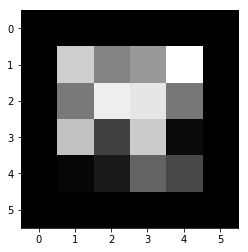

In [73]:
plt.imshow(lbp,cmap=plt.cm.gray)

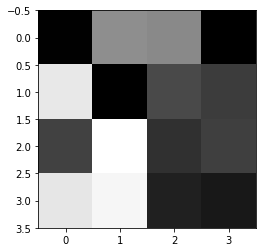

In [74]:
plt.imshow(newimg,cmap=plt.cm.gray)

In [75]:
(hist, _) = np.histogram(newimg.ravel(),bins=np.arange(0,255),range=(0,255))

In [76]:
hist # feature vector which is used to classify.

array([2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [77]:
print(newimg)

[[  1 139 134   0]
 [226   0  72  60]
 [ 64 249  48  62]
 [224 240  32  24]]


In [79]:
numPoints=8
(histuniform, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))

In [80]:
histuniform

array([20,  0,  0,  0,  0,  0,  1,  0,  0,  1], dtype=int64)